# Keras and Chelo
Keras can be directly used with chelo. We will present two application examples.
One for classification using an MLP model and one for regression using a recurrent model.

In [2]:
from chelo import DatasetRegistry
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras


dataset = DatasetRegistry.get_dataset("AmesMutagenicityDataset")
dataset.load_data()
X, y = dataset.to_numpy()
y = y.ravel()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)


We can now define and train the model.

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPooling2D, Conv2D, Flatten, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

# Build the model
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
results = model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test)
)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5288 - loss: 0.6916 - val_accuracy: 0.6331 - val_loss: 0.6511
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6416 - loss: 0.6415 - val_accuracy: 0.6531 - val_loss: 0.6323
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - loss: 0.6274 - val_accuracy: 0.6548 - val_loss: 0.6160
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6652 - loss: 0.6145 - val_accuracy: 0.6652 - val_loss: 0.6081
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.5974 - val_accuracy: 0.6635 - val_loss: 0.6015
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - loss: 0.5976 - val_accuracy: 0.6635 - val_loss: 0.6001
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - loss: 0.5985 - val_accuracy: 0.6713 - val_loss: 0.5946
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6900 - loss: 0.5917 - val_accuracy: 0.6782 - val_loss

We can try adding dropout to improve performance:

In [8]:

# Build the model
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
results = model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test)
)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5902 - loss: 0.6763 - val_accuracy: 0.6314 - val_loss: 0.6451
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6602 - loss: 0.6331 - val_accuracy: 0.6435 - val_loss: 0.6224
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6609 - loss: 0.6169 - val_accuracy: 0.6487 - val_loss: 0.6194
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6745 - loss: 0.6116 - val_accuracy: 0.6730 - val_loss: 0.6064
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6710 - loss: 0.6030 - val_accuracy: 0.6722 - val_loss: 0.6009
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6759 - loss: 0.6023 - val_accuracy: 0.6748 - val_loss: 0.5996
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 0.6016 - val_accuracy: 0.6739 - val_loss: 0.5973
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6810 - loss: 0.5878 - val_accuracy: 0.6756 - val_loss:

We can also tackle a regression problem:

In [13]:
# Load and prepare the dataset
dataset = DatasetRegistry.get_dataset("CSTRDataset", window=5)
dataset.load_data()

# Extract features (X) and target (y)
X, y = dataset.to_numpy()

# Flatten the past window (for scaling purposes)
X = X.reshape(X.shape[0], -1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and restore shape
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).reshape(X_train.shape[0], 5, -1)
X_test = scaler.transform(X_test).reshape(X_test.shape[0], 5, -1)


(20, 5, 3)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

# Adjust the input shape for LSTM
input_shape = (5, 3)

model = Sequential()
# Add an LSTM layer
model.add(Input(shape=input_shape))
model.add(LSTM(32, activation='tanh', return_sequences=False))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation=None))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Train the model
results = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1068 - mse: 0.1068 - val_loss: 0.1051 - val_mse: 0.1051
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0986 - mse: 0.0986 - val_loss: 0.0972 - val_mse: 0.0972
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0910 - mse: 0.0910 - val_loss: 0.0913 - val_mse: 0.0913
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0840 - mse: 0.0840 - val_loss: 0.0862 - val_mse: 0.0862
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0783 - mse: 0.0783 - val_loss: 0.0810 - val_mse: 0.0810
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0735 - mse: 0.0735 - val_loss: 0.0761 - val_mse: 0.0761
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0713 - val_mse: 0.0713
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0652 - mse: 0.0652 - val_loss: 0.0668 - val_mse: 0.0668
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0615 - mse: 0.0615 - va

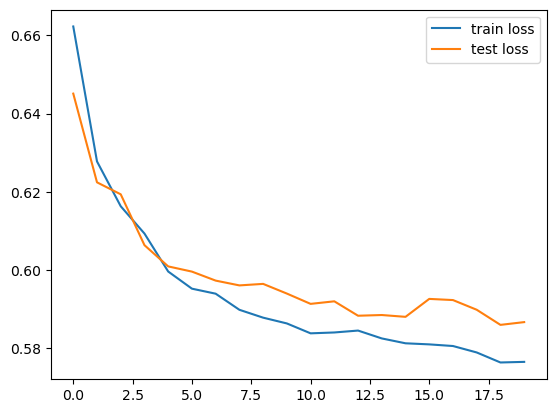

In [25]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])